**Imports**

In [1]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model 
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline 
from sklearn.linear_model import LinearRegression
from scipy.stats import lognorm

**Download data**

In [2]:
def cVirale(day):
    s = 0.5
    mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
    x = np.linspace(lognorm.ppf(0, s),lognorm.ppf(0.99, s), 100)
    days = np.linspace(-5, 15, len(x))

    lr = LinearRegression()
    lr.fit(days.reshape(-1, 1), x)
    return(float(lognorm.pdf(lr.predict([[day]]), s)/max(lognorm.pdf(x, s))))

c = []
for day in np.arange(-5, 20):
    c.append(cVirale(day))

print(c)

[0.0, 0.006677901547061112, 0.20554832549664084, 0.6260173091451563, 0.9258817062987911, 0.9985862736692374, 0.9162189346640229, 0.7679591151685397, 0.610329964595226, 0.4697292197249814, 0.3545709672216219, 0.2646046793977712, 0.19623651064484002, 0.1451258561791916, 0.1072760405678079, 0.07938597387327306, 0.05887643571110518, 0.04379456311642677, 0.03268883837071063, 0.02449203116429482, 0.018424189041023917, 0.013916949826873196, 0.01055644859237273, 0.00804109995832768, 0.006150748821714521]


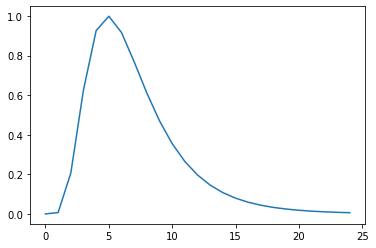

In [3]:
plt.plot(c)

#save_fig('best_fit_model_plot')
plt.show()

In [4]:
def getNewInfected(infected):
    totalInfected=[0]+infected
    output=[]
    for i in range(len(totalInfected)-1):
        output+=[totalInfected[i+1]-totalInfected[i]]
    return(output)

In [5]:
infected = getNewInfected([1, 3, 5, 6, 10])

In [6]:
print(infected)

[1, 2, 2, 1, 4]


In [7]:
idCovidP0=list(np.random.choice(range(100),np.sum(np.array(infected)),replace=False))

In [8]:
print(idCovidP0)

[29, 58, 42, 38, 59, 5, 77, 52, 70, 33]


In [9]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/FSR/master/IDDLO-29-20/Notebooks/datasets/"
os.makedirs(data_path, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = download_path + filename
    urllib.request.urlretrieve(url, data_path + filename)

In [10]:
oecd_bli = pd.read_csv(data_path + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(data_path + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [11]:
#take a look to the first file
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


**Preprocessing**

In [12]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [13]:
#take a look to the first file
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [14]:
# Preprocessing of the data  (iterested with column "2015" which is the "GDP per capita")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [15]:
#merge data  
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

data = full_country_stats[["GDP per capita", 'Life satisfaction']]

**Linear Regression Model**

In [16]:
data.head()

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


Select some features

In [17]:
#select the features you are interested in
X = np.c_[data["GDP per capita"]]
y = np.c_[data["Life satisfaction"]]
np.shape(X)

(36, 1)

Visualization

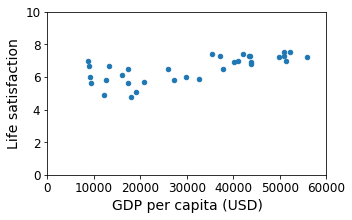

In [18]:
# Visualize the sample data
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

plt.xlabel("GDP per capita (USD)")

plt.show()
#

Training

In [19]:
lrModel = sklearn.linear_model.LinearRegression()

# Train the model
lrModel.fit(X, y)

#model parameters
w0, w1 = lrModel.intercept_[0], lrModel.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel.score(X, y))

0.40410998750014104


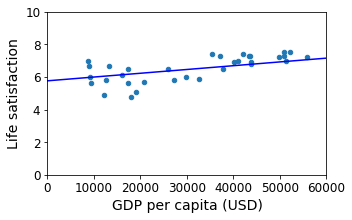

In [20]:
#plot
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
x=np.linspace(0, 60000, 1000)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

Prediction

In [21]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(lrModel.predict(X_new)) # outputs [[ 5.96242338]]

[[6.28653637]]


**Add polynomial features**

In [22]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scal', StandardScaler()), ('lin', LinearRegression())])

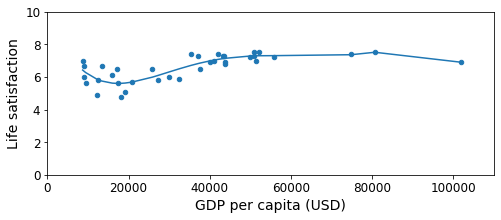

In [23]:
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

curve = pipelineLRModel.predict(X)
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()

In [24]:
#R2
print(pipelineLRModel.score(X, y))

0.6806653014078081



**Regularization (Ridge)**

In [25]:
lrModelRidge = sklearn.linear_model.Ridge(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelRidge.fit(Xsample, ysample)
w0ridge, w1ridge = lrModelRidge.intercept_[0], lrModelRidge.coef_[0][0]

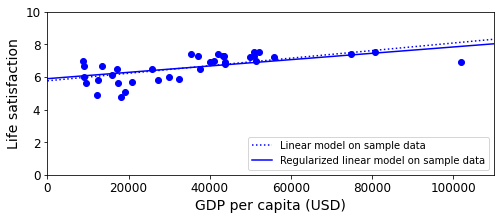

In [26]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge + w1ridge * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [27]:
#R2
print(lrModelRidge.score(X, y))

0.393541332439984


**Exercice**

1- try LASSO regularization

In [32]:
from sklearn.linear_model import Lasso
lrModelLASSO = sklearn.linear_model.Lasso(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelLASSO.fit(Xsample, ysample)
w0LASSO = lrModelLASSO.intercept_[0] 
w1LASSO = lrModelLASSO.coef_[0]

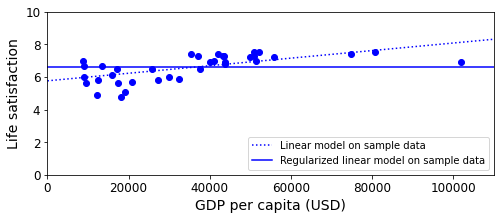

In [33]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0LASSO + w1LASSO*x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [34]:
#R2
print(lrModelLASSO.score(X, y))

0.0


2- try on different data

In [35]:
import pandas as pd
url = "https://raw.githubusercontent.com/manhili/Assignment-Linear-Regression/main/datasets/HousingData.csv"
data2 = pd.read_csv(url, na_values="NaN")

In [36]:
#take a look to the file
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [40]:
#drop missing values
data2 = data2.dropna()


In [41]:
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


**Select some features**

In [42]:
#select the features you are interested in
X = np.c_[data2["RM"]]
y = np.c_[data2["MEDV"]]
np.shape(X)

(394, 1)

In [43]:
def area(df):
    min_col = {}
    max_col = {}
    for col in df:
        max_col[col]= df[col].max()
        min_col[col]= df[col].min()

    result = pd.DataFrame([min_col, max_col], index=['min', 'max'])
    return result

In [44]:
# print min & max of each feature 
area(data2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
min,0.00632,0.0,0.46,0.0,0.389,3.561,2.9,1.1296,1,187,12.6,2.6,1.73,5.0
max,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24,711,22.0,396.9,37.97,50.0


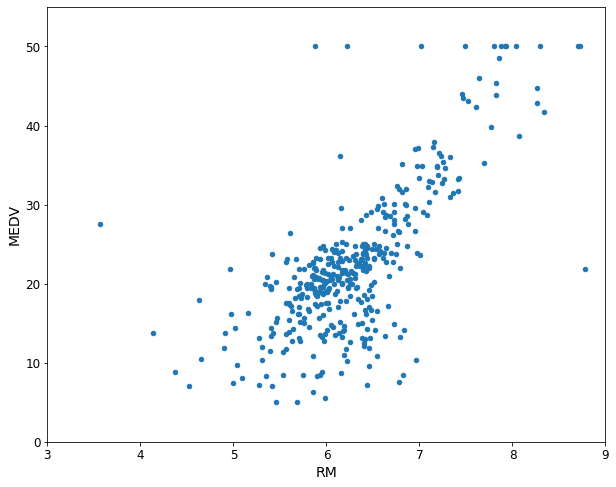

In [45]:
# Visualize the sample data
data2.plot(kind='scatter', x="RM", y='MEDV', figsize=(10,8))
plt.axis([3, 9, 0, 55])
plt.show()

**Training**

In [46]:
lrModel = sklearn.linear_model.LinearRegression()

# Train the model
lrModel.fit(X, y)

#model parameters
w0, w1 = lrModel.intercept_[0], lrModel.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel.score(X, y))

0.5241047099146254


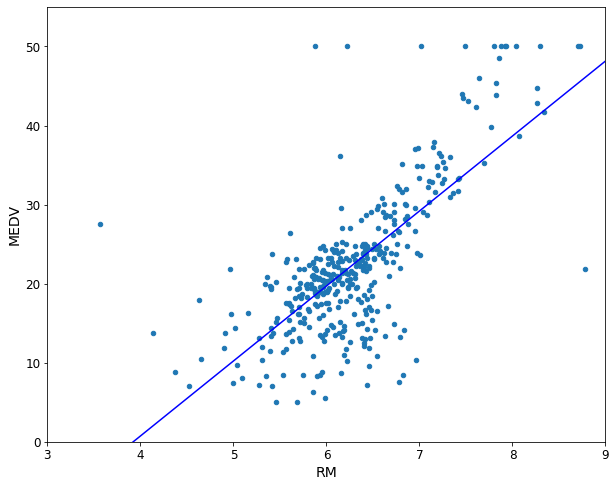

In [47]:
#plot
data2.plot(kind='scatter', x="RM", y='MEDV', figsize=(10,8))
plt.axis([3, 9, 0, 55])
x=np.linspace(3, 9, 200)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

**prediction**

In [48]:
# Make a prediction for bs
X_new = [[10]]  
print(lrModel.predict(X_new)) # outputs [[10.36071063]]

[[57.63666577]]


**Add polynomial features**


In [49]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scal', StandardScaler()), ('lin', LinearRegression())])

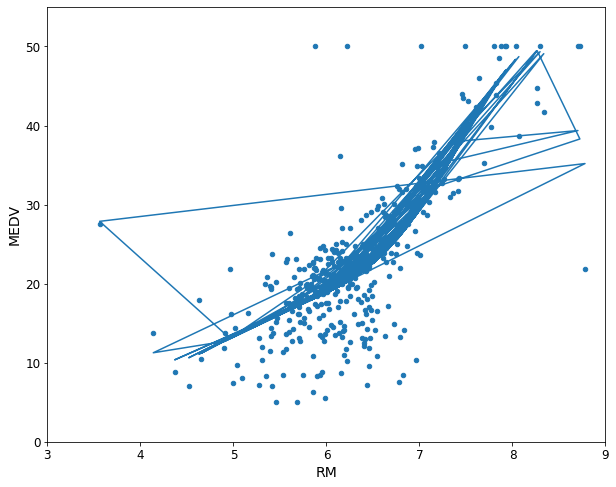

In [51]:
data2.plot(kind='scatter', x="RM", y='MEDV', figsize=(10,8))
plt.axis([3, 9, 0, 55])

curve = pipelineLRModel.predict(X)
plt.plot(X, curve)
plt.show()

In [52]:
#R2
print(pipelineLRModel.score(X, y))

0.6282718839065651


**Regularization (Ridge)**

In [54]:
lrModelRidge2 = sklearn.linear_model.Ridge(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data2["RM"]]
ysample = np.c_[data2["MEDV"]]
lrModelRidge2.fit(Xsample, ysample)
w0ridge2, w1ridge2 = lrModelRidge2.intercept_[0], lrModelRidge2.coef_[0]

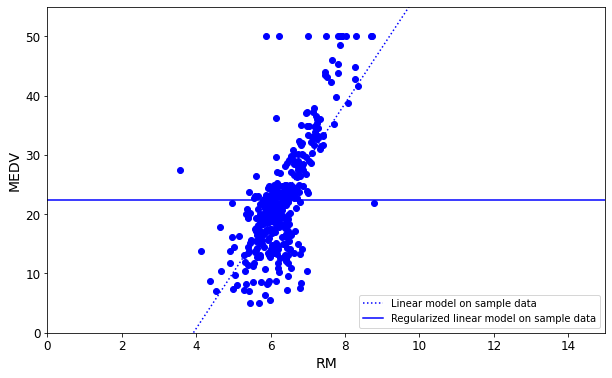

In [55]:
f = plt.figure(figsize=(10,6))

plt.xlabel("RM")
plt.ylabel('MEDV')

plt.plot(list(data2["RM"]), list(data2["MEDV"]), "bo")

x = np.linspace(0, 15, 100)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge2 + w1ridge2 * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 15, 0, 55])

plt.show()

In [56]:
#R2
print(lrModelRidge2.score(X, y))

6.346475422969178e-08


In [57]:
lrModelLasso2 = sklearn.linear_model.Lasso(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data2["RM"]]
ysample = np.c_[data2["MEDV"]]
lrModelLasso2.fit(Xsample, ysample)
w0lasso2, w1lasso2 = lrModelLasso2.intercept_[0], lrModelLasso2.coef_[0]


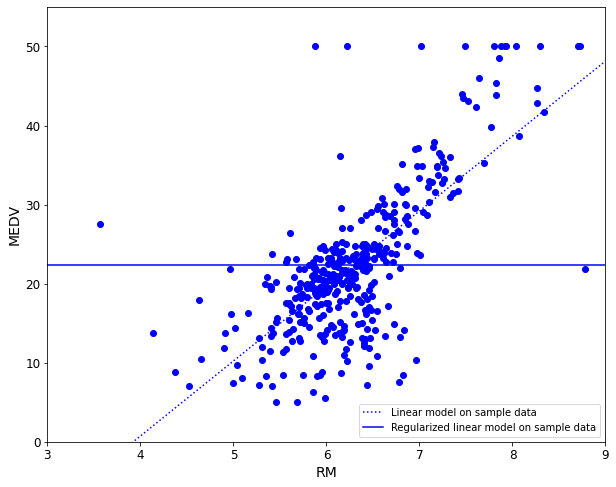

In [58]:
f = plt.figure(figsize=(10,8))

plt.xlabel("RM")
plt.ylabel('MEDV')

plt.plot(list(data2["RM"]), list(data2["MEDV"]), "bo")

x = np.linspace(0, 15, 100)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0lasso2 + w1lasso2*x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([3, 9, 0, 55])

plt.show()

In [59]:
#R2
print(lrModelLasso2.score(X, y))

0.0


3- try with more features

4- tune the regularization hyper-parameter alpha (lambda in the course)